In [3]:
import numpy as np
import matplotlib.pyplot as plt
data = np.load("assignment6.npz")
scores_small = data['scores_small']
scores_large = data['scores_large']
labels_small = data['labels_small']
labels_large = data['labels_large']

In [30]:
def roc_auc_pfa(scores, labels, maxpfa, minpfa = 0):
  #sortedIndecies = np.argsort(scores)[::-1]
  #sortedScores = scores[sortedIndecies]
  #sortedLabels = labels[sortedIndecies]
  numberPositives = np.sum(labels == 1)
  numberNegatives = np.sum(labels == 0)
  pfaTotal, pdTotal = [], []
  pfa_in_range, pd_in_range = [], []
  auc_in_range = 0
  for s in scores:
    predictLabels = []
    for i in range(len(labels)):
      if scores[i] <= s:
        predictLabels.append(0)
      else:
        predictLabels.append(1)
    tp, fp, tn, fn = 0, 0, 0, 0
    for i in range(len(predictLabels)):
      if predictLabels[i] == 1 and predictLabels[i] == labels[i]:
        tp += 1
      elif predictLabels[i] == 1 and predictLabels[i] != labels[i]:
        fp += 1
      elif predictLabels[i] == 0 and predictLabels[i] == labels[i]:
        tn += 1
      elif predictLabels[i] == 0 and predictLabels[i] != labels[i]:
        fn += 1
    pfa = fp / numberNegatives
    pd = tp / numberPositives
    pfaTotal.append(pfa)
    pdTotal.append(pd)

  for i in range(len(pfaTotal)):
    if minpfa <= pfaTotal[i] <= maxpfa:
      pfa_in_range.append(pfaTotal[i])
      pd_in_range.append(pdTotal[i])
  pfa_in_range.sort()
  pd_in_range.sort()
  for i in range(len(pfa_in_range) - 1):
    auc_in_range += 0.5 * (pd_in_range[i] + pd_in_range[i + 1]) * (pfa_in_range[i + 1] - pfa_in_range[i])
  return pfa_in_range, pd_in_range, auc_in_range

1. Plot the ROC curve and calculate the AUC for the following ranges:

a. PFA ∈ [0, 1.0], the full range of thresholds

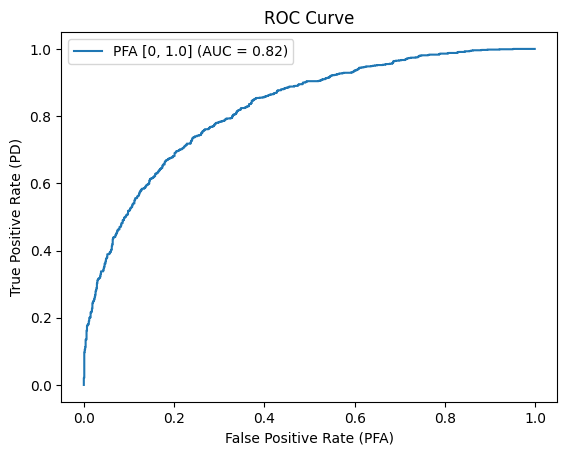

In [31]:
pfaFull, pdFull, aucFull = roc_auc_pfa(scores_large, labels_large, 1)
plt.plot(pfaFull, pdFull, label= f'PFA [0, 1.0] (AUC = {aucFull:.2f})')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate (PFA)")
plt.ylabel("True Positive Rate (PD)")
plt.legend()
plt.show()

b. PFA ∈ [0, 0.4]

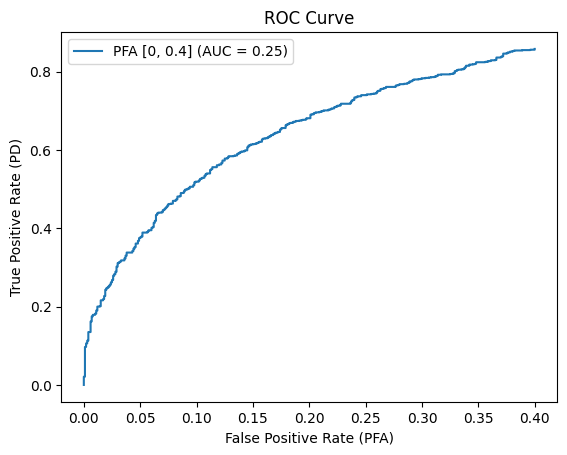

In [32]:
pfa04, pd04, auc04 = roc_auc_pfa(scores_large, labels_large, 0.4)
plt.plot(pfa04, pd04, label= f'PFA [0, 0.4] (AUC = {auc04:.2f})')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate (PFA)")
plt.ylabel("True Positive Rate (PD)")
plt.legend()
plt.show()

c. PFA ∈ [0, 0.75]

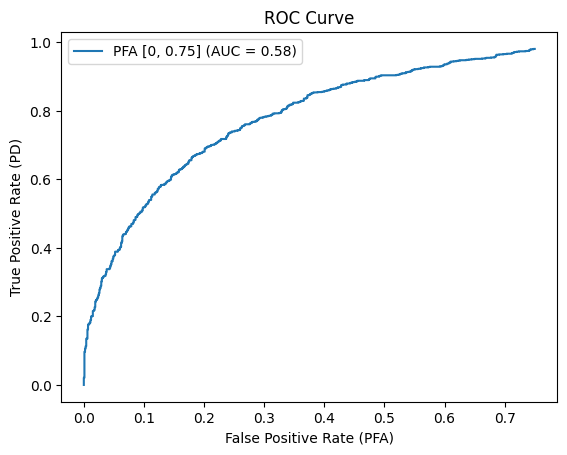

In [33]:
pfa075, pd075, auc075 = roc_auc_pfa(scores_large, labels_large, 0.75)
plt.plot(pfa075, pd075, label= f'PFA [0, 0.75] (AUC = {auc075:.2f})')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate (PFA)")
plt.ylabel("True Positive Rate (PD)")
plt.legend()
plt.show()

d. PFA ∈ [0.25, 0.75]

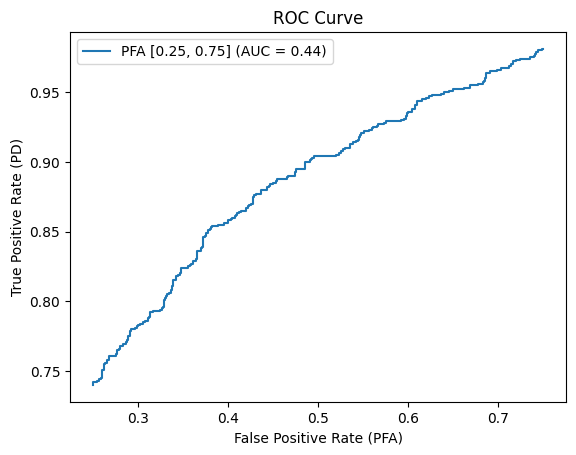

In [34]:
pfa025_075, pd025_075, auc025_075 = roc_auc_pfa(scores_large, labels_large, 0.75, 0.25)
plt.plot(pfa025_075, pd025_075, label= f'PFA [0.25, 0.75] (AUC = {auc025_075:.2f})')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate (PFA)")
plt.ylabel("True Positive Rate (PD)")
plt.legend()
plt.show()

3. What thresholds provide a precision of 0.9?

In [55]:
def find_threshold_for_precision(scores, labels, targetPrecision):
  thresholds, precisions, accuracies = [], [], []
  for s in scores:
    predictLabels = []
    for i in range(len(labels)):
      if scores[i] <= s:
        predictLabels.append(0)
      else:
        predictLabels.append(1)
    tp, fp, tn, fn = 0, 0, 0, 0
    for i in range(len(predictLabels)):
      if predictLabels[i] == 1 and predictLabels[i] == labels[i]:
        tp += 1
      elif predictLabels[i] == 1 and predictLabels[i] != labels[i]:
        fp += 1
      elif predictLabels[i] == 0 and predictLabels[i] == labels[i]:
        tn += 1
      elif predictLabels[i] == 0 and predictLabels[i] != labels[i]:
        fn += 1
    if (tp + fp) != 0:
      precision = tp / (tp + fp)
      if abs(precision - targetPrecision) <= 0.001:
        accuracy = (tp + tn) / (tp + fp + tn + fn)
        thresholds.append(s)
        precisions.append(precision)
        accuracies.append(accuracy)
  return thresholds, precisions, accuracies
thresholds, precisions, accuracies = find_threshold_for_precision(scores_large, labels_large, 0.9)
avgThreshold = sum(thresholds) / len(thresholds)
avgPrecision = sum(precisions) / len(precisions)
print("Thresholds provides a precision of 0.9:", thresholds)
print("Average Threshold:", avgThreshold)
print("Relative precisions:", precisions)
print("Average Precision:", avgPrecision)

Thresholds provides a precision of 0.9: [1.106543268101517, 1.0997159612732068, 1.1059731003652715, 1.1159880060210832, 1.1066845370765228]
Average Threshold: 1.10698097456752
Relative precisions: [0.8994413407821229, 0.8991825613079019, 0.8997214484679665, 0.9008498583569405, 0.8991596638655462]
Average Precision: 0.8996709745560956


4. At this threshold, what is the accuracy of the classifier?

In [54]:
print("Accuracies of the classifier at this threshold:", accuracies)
avgAccuracies = sum(accuracies) / len(accuracies)
print("Average accuracies:", avgAccuracies)

Accuracies of the classifier at this threshold: [0.643, 0.6465, 0.6435, 0.6415, 0.6425]
Average accuracies: 0.6434
